Testing 10 numbers with 5 digits...
Mean Time for 5-digit numbers: 0.00079s

Testing 10 numbers with 6 digits...
Mean Time for 6-digit numbers: 0.00170s

Testing 10 numbers with 7 digits...
Mean Time for 7-digit numbers: 0.00379s

Testing 10 numbers with 8 digits...
Mean Time for 8-digit numbers: 0.01244s

Testing 10 numbers with 9 digits...
Mean Time for 9-digit numbers: 0.08088s

Testing 10 numbers with 10 digits...
Mean Time for 10-digit numbers: 0.22556s

Testing 10 numbers with 11 digits...
Mean Time for 11-digit numbers: 0.54475s

Testing 10 numbers with 12 digits...
Mean Time for 12-digit numbers: 1.54119s



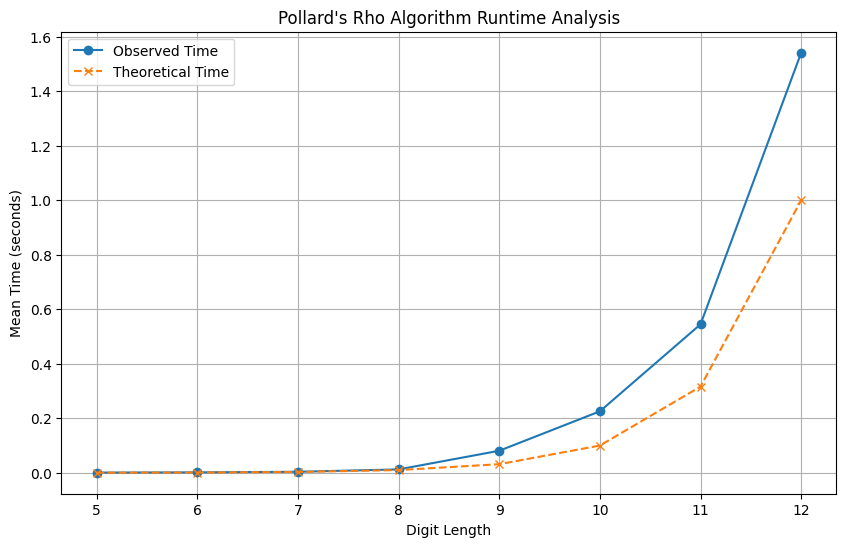

In [52]:
from sympy import mod_inverse, isprime
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def pollards_rho_discrete_log(g, h, n):
    # Partition function based on x
    def f(x, a, b):
        if x % 3 == 0:
            x = (x * g) % n
            a = (a + 1) % n
        elif x % 3 == 1:
            x = (x * h) % n
            b = (b + 1) % n
        else:
            x = (x * x) % n
            a = (2 * a) % n
            b = (2 * b) % n
        return x, a, b

    # Initialize variables
    x0, a0, b0 = 1, 0, 0
    x1, a1, b1 = 1, 0, 0

    while True:
        # Move x0 one step
        x0, a0, b0 = f(x0, a0, b0)
        # Move x1 two steps
        x1, a1, b1 = f(x1, a1, b1)
        x1, a1, b1 = f(x1, a1, b1)

        # Check for collision
        if x0 == x1:
            r = (b1 - b0) % n
            if r == 0:
                raise ValueError("Failure: r = 0, cannot compute discrete logarithm.")

            # Compute discrete logarithm
            r_inv = mod_inverse(r, n)
            x = (r_inv * (a0 - a1)) % n
            if x < 0:  # Handle negative values
                x += n
            return x

# Test for increasing digit lengths until 5 out of 10 fail
fail_threshold = 5
num_tests = 10
max_digits = 12

# Store results for plotting
digit_lengths = []
mean_times = []

def generate_random_prime(digit_length):
    while True:
        candidate = random.randint(10**(digit_length-1), 10**digit_length - 1)
        if isprime(candidate):
            return candidate

digit_length = 5
while digit_length <= max_digits:
    failures = 0
    successes = 0
    times = []

    # Generate random primes directly instead of precomputing all primes
    random_primes = [generate_random_prime(digit_length) for _ in range(num_tests)]

    print(f"Testing {num_tests} numbers with {digit_length} digits...")

    for prime in random_primes:
        g = random.randint(2, prime - 1)
        h = random.randint(1, prime - 1)
        start_time = time.time()
        try:
            result = pollards_rho_discrete_log(g, h, prime)
            elapsed_time = time.time() - start_time
            # print(f"Prime: {prime:<8}\tg: {g:<8}\th: {h:<8}\tLog: {result:<8}\tTime: {elapsed_time:.5f}s")
            times.append(elapsed_time)
            successes += 1
        except ValueError as e:
            elapsed_time = time.time() - start_time
            # print(f"Prime: {prime:<8}\tg: {g:<8}\th: {h:<8}\tLog: {'Fail':<8}\tTime: {elapsed_time:.5f}s")
            times.append(elapsed_time)
            failures += 1

    # Print mean time
    mean_time = sum(times) / len(times)
    print(f"Mean Time for {digit_length}-digit numbers: {mean_time:.5f}s\n")

    # Store results for plotting
    digit_lengths.append(digit_length)
    mean_times.append(mean_time)

    # Stop if failures exceed threshold
    if failures >= fail_threshold:
        print(f"Failed {failures} out of {num_tests} for {digit_length}-digit numbers. Stopping.")
        break

    digit_length += 1

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(digit_lengths, mean_times, marker='o', label='Observed Time')

# Theoretical time complexity O(sqrt(n)) ~ O(10^(d/2))
theoretical_times = [10**(d/2) * 1e-6 for d in digit_lengths]  # Scaled for visualization
plt.plot(digit_lengths, theoretical_times, marker='x', linestyle='--', label='Theoretical Time')

plt.xlabel('Digit Length')
plt.ylabel('Mean Time (seconds)')
plt.title('Pollard\'s Rho Algorithm Runtime Analysis')
plt.legend()
plt.grid(True)
plt.show()